 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [56]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [57]:
# Reading whale returns
whales_data=Path('Resources/whale_returns.csv')
whales_df=pd.read_csv(whales_data,index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [58]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [59]:
# Drop nulls
whales_df.dropna(inplace=True)
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [60]:
# Reading algorithmic returns
algo_data=Path('Resources/algo_returns.csv')
algo_df=pd.read_csv(algo_data,index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [61]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [62]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [63]:
# Reading S&P 500 Closing Prices
sp500_data=Path('Resources/sp500_history.csv')
sp500_df=pd.read_csv(sp500_data,index_col='Date', infer_datetime_format=True,parse_dates=True).sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [64]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [65]:
########## Fix Data Types
#need to figure out how to get rid of the $ too
sp500_df['Close']=sp500_df['Close'].str.replace('$', '', regex=True)
sp500_df['Close']=sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [66]:
############# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [67]:
######## Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [68]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns=['closing prices - sp500']
sp500_df.head()

,closing prices - sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [69]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whales_df,algo_df,sp500_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,closing prices - sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [70]:
portfolio=combined_df.drop(columns='closing prices - sp500')

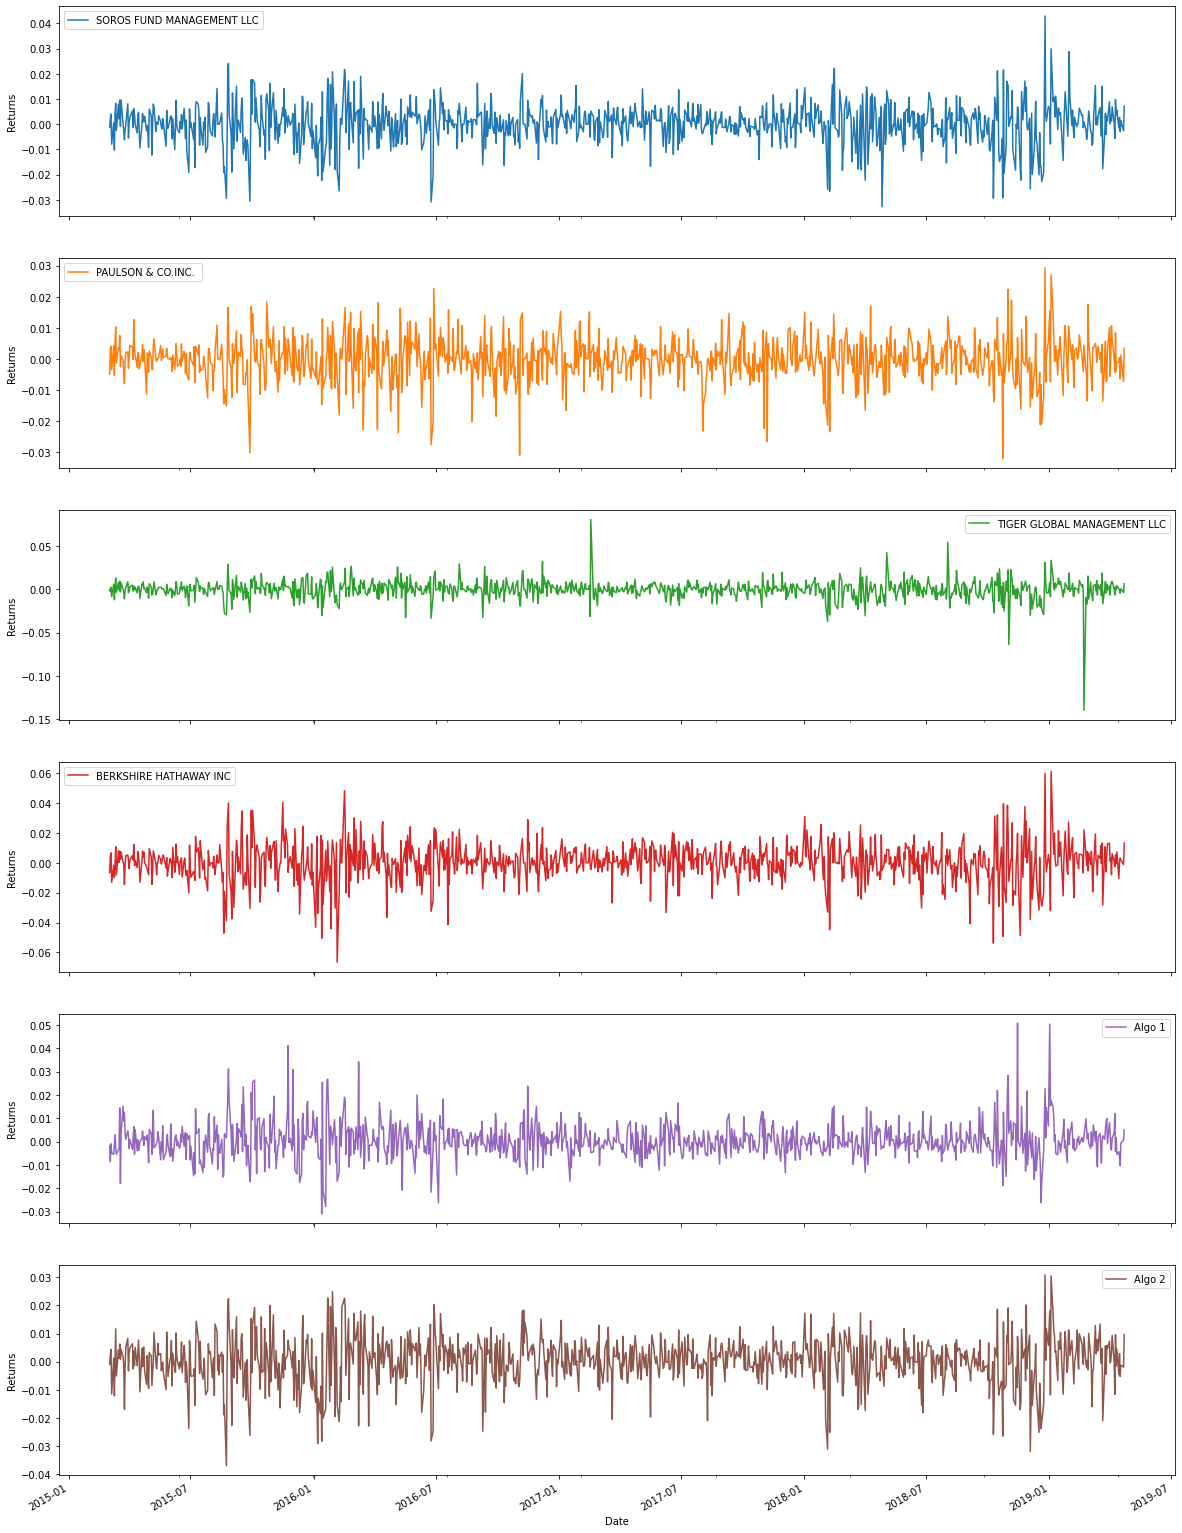

In [71]:

portfolio.plot(subplots=True,ylabel='Returns',figsize=(20,30));


#### Calculate and Plot cumulative returns.

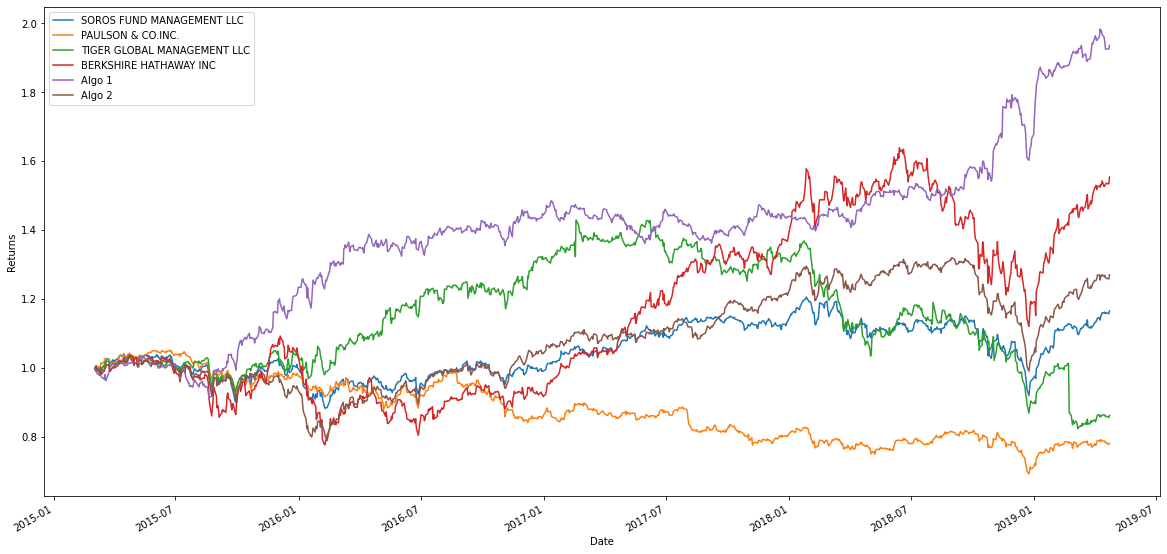

In [72]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),ylabel='Returns');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Portfolio Returns')

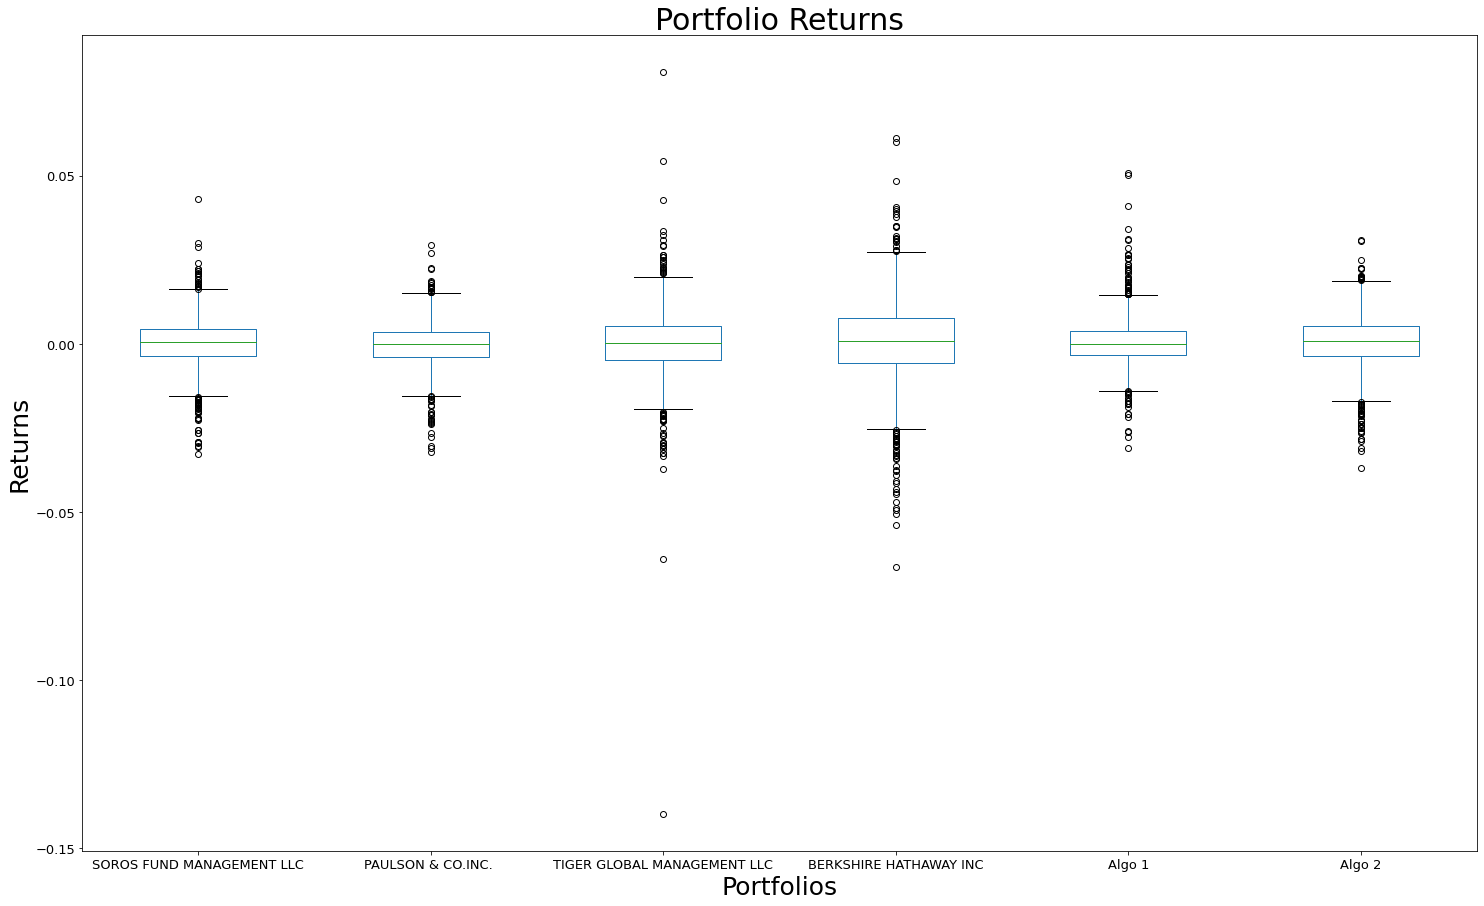

In [73]:
# Box plot to visually show risk
portfolio_plot=portfolio.plot(figsize=(25,15),fontsize='13',kind='box');
portfolio_plot.set_xlabel('Portfolios',fontsize='25');
portfolio_plot.set_ylabel('Returns',fontsize='25');
portfolio_plot.set_title(label='Portfolio Returns',fontsize='30')

### Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all portfolios
portfolio_std=portfolio.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [75]:
# Calculate  the daily standard deviation of S&P 500
sp500_std=sp500_df.std()
sp500_std

# Determine which portfolios are riskier than the S&P 500
############

closing prices - sp500    0.008111
dtype: float64

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std()*(252**.5)


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
closing prices - sp500         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

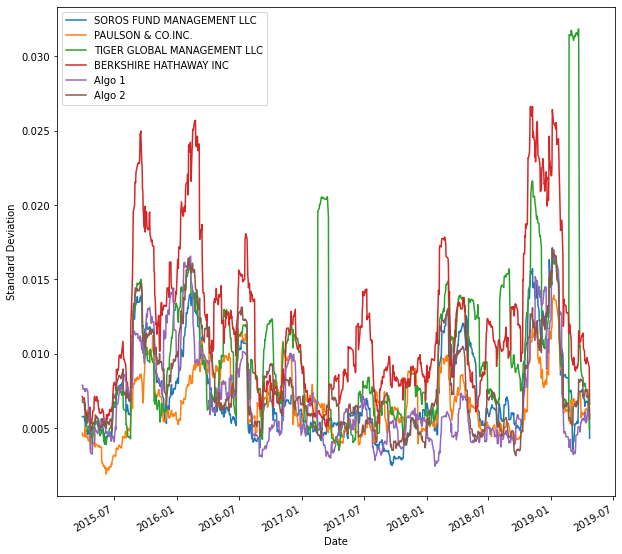

In [77]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std=portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(ylabel='Standard Deviation',figsize=(10,10));

### Calculate and plot the correlation

In [78]:
# Calculate the correlation
combined_df_corr=combined_df.corr()
combined_df_corr
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,closing prices - sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
closing prices - sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date', ylabel='Beta'>

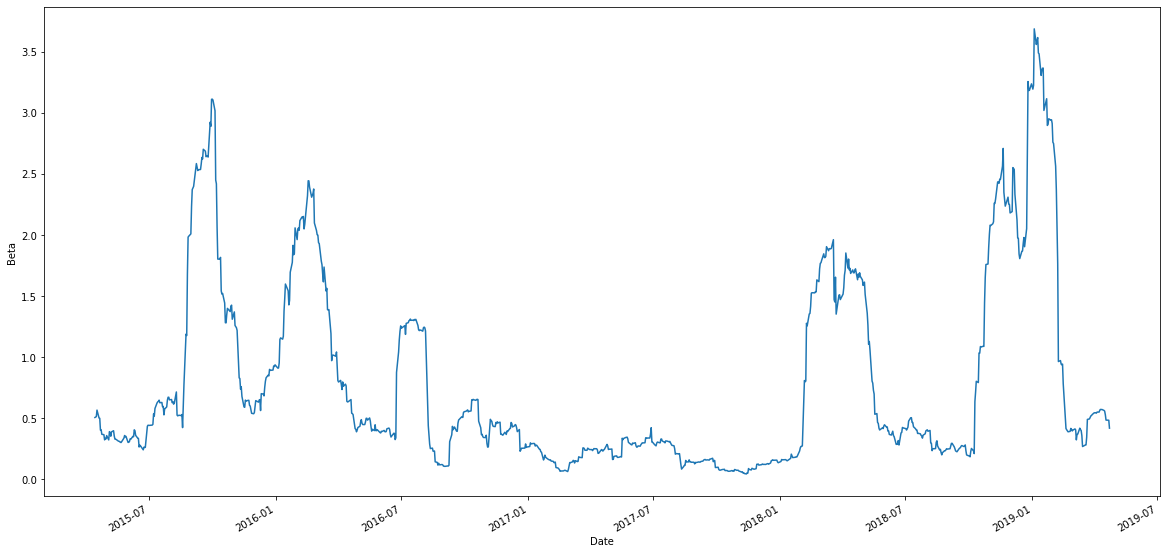

In [79]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(combined_df['closing prices - sp500'])
# Calculate variance of S&P 500
variance = combined_df['closing prices - sp500'].var()
# Computing beta
SFM_beta = covariance / variance
# Plot beta trend
SFM_beta.plot(ylabel='Beta',figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [80]:
# Use `ewm` to calculate the rolling window
portfolio.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290
...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Annualized Sharpe Ratios
sharpe_ratio_annual=combined_df.mean()/combined_df.std()*(252**.5)
sharpe_ratio_annual

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
closing prices - sp500         0.648267
dtype: float64

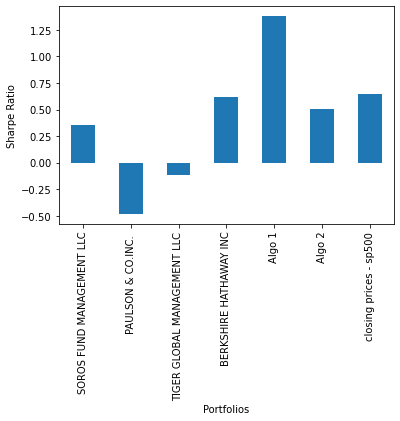

In [82]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_annual.plot(kind='bar',xlabel='Portfolios',ylabel='Sharpe Ratio');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms every other stock, as its sharpe ratio is the highest. Ago 2 does well, but is outperformed by both the sp500 and Berkshire Hathaaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [83]:
# Reading data from 1st stock
meta_data=Path('../meta_historical.csv')
meta_df=pd.read_csv(meta_data,index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
meta_df.head()

,Close
Date,
2021-01-04,268.94
2021-01-05,270.97
2021-01-06,263.31
2021-01-07,268.74
2021-01-08,267.57


In [84]:
# Reading data from 2nd stock
lyft_data=Path('../lyft_historical.csv')
lyft_df=pd.read_csv(lyft_data,index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
lyft_df.head()

,Close
Date,
2021-01-04,47.28
2021-01-05,48.85
2021-01-06,47.46
2021-01-07,48.84
2021-01-08,47.50


In [85]:
# Reading data from 3rd stock
uber_data=Path('../uber_historical.csv')
uber_df=pd.read_csv(uber_data,index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
uber_df.head()

,Close
Date,
2021-01-04,51.14
2021-01-05,54.01
2021-01-06,52.48
2021-01-07,56.13
2021-01-08,53.28


In [86]:
# Combine all stocks in a single DataFrame
combined_stock_df = pd.concat([meta_df,lyft_df,uber_df], axis="columns",join="inner")
combined_stock_df.head()


,Close,Close,Close
Date,,,
2021-01-04,268.94,47.28,51.14
2021-01-05,270.97,48.85,54.01
2021-01-06,263.31,47.46,52.48
2021-01-07,268.74,48.84,56.13
2021-01-08,267.57,47.50,53.28


In [87]:
# Reset Date index
#combined_stock_df.index=combined_stock_df.index
#combined_stock_df.reset_index(inplace=True)
#combined_stock_df.set_index("Date", inplace=True)
combined_stock_df.index=combined_stock_df.index
combined_stock_df.head()

,Close,Close,Close
Date,,,
2021-01-04,268.94,47.28,51.14
2021-01-05,270.97,48.85,54.01
2021-01-06,263.31,47.46,52.48
2021-01-07,268.74,48.84,56.13
2021-01-08,267.57,47.50,53.28


In [88]:
# Reorganize portfolio data by having a column per symbol
combined_stock_df.columns=['META','LYFT','UBER']
combined_stock_df.head()

,META,LYFT,UBER
Date,,,
2021-01-04,268.94,47.28,51.14
2021-01-05,270.97,48.85,54.01
2021-01-06,263.31,47.46,52.48
2021-01-07,268.74,48.84,56.13
2021-01-08,267.57,47.50,53.28


In [89]:
# Calculate daily returns
combined_stock_df['META'] = combined_stock_df['META'].pct_change()
combined_stock_df['LYFT'] = combined_stock_df['LYFT'].pct_change()
combined_stock_df['UBER'] = combined_stock_df['UBER'].pct_change()
combined_stock_df.head()
# Drop NAs
combined_stock_df.dropna(inplace=True)
# Display sample data
combined_stock_df.isnull().sum()
combined_stock_df.head()

,META,LYFT,UBER
Date,,,
2021-01-05,0.007548,0.033206,0.056120
2021-01-06,-0.028269,-0.028454,-0.028328
2021-01-07,0.020622,0.029077,0.069550
2021-01-08,-0.004354,-0.027437,-0.050775
2021-01-11,-0.040102,0.018316,0.024587


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [90]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_weighted = combined_stock_df.dot(weights)
# Display sample data
portfolio_returns_weighted.head()

Date
2021-01-05    0.032292
2021-01-06   -0.028350
2021-01-07    0.039750
2021-01-08   -0.027522
2021-01-11    0.000934
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [91]:
# Join your returns DataFrame to the original returns DataFrame
# combined_df.dropna(inplace=True)
# combined_stock_df.dropna(inplace=True)
pd.concat([combined_stock_df,combined_df], axis=1, join='inner')

,META,LYFT,UBER,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,closing prices - sp500
Date,,,,,,,,,,


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_df.dropna(inplace=True)
final_df.isnull().sum()
final_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,closing prices - sp500,META,LYFT,UBER
Date,,,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
final_df.std()*(252**.5)

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
closing prices - sp500        NaN
META                          NaN
LYFT                          NaN
UBER                          NaN
dtype: float64

### Calculate and plot rolling `std` with 21-day window

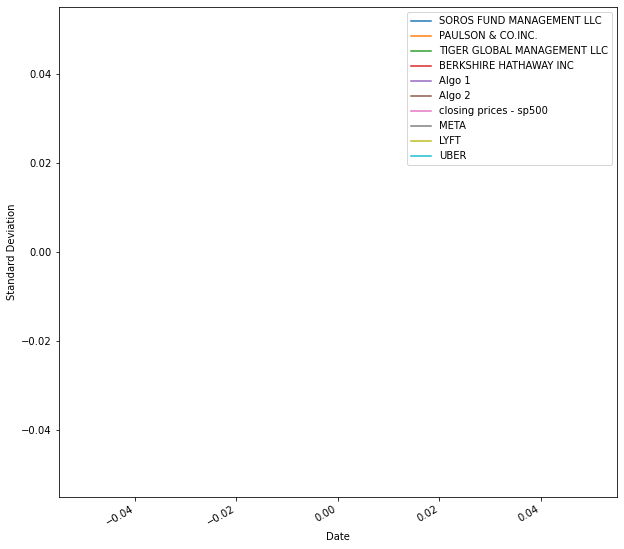

In [39]:
# Calculate rolling standard deviation
final_rolling_std=final_df.rolling(window=21).std()
# Plot the rolling standard deviation
final_rolling_std.plot(ylabel='Standard Deviation',figsize=(10,10));


### Calculate and plot the correlation

<AxesSubplot:>

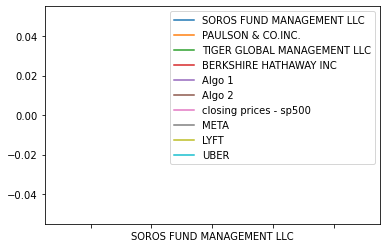

In [40]:
# Calculate and plot the correlation
corr_final_df=final_df.corr()
corr_final_df.plot()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date', ylabel='Beta'>

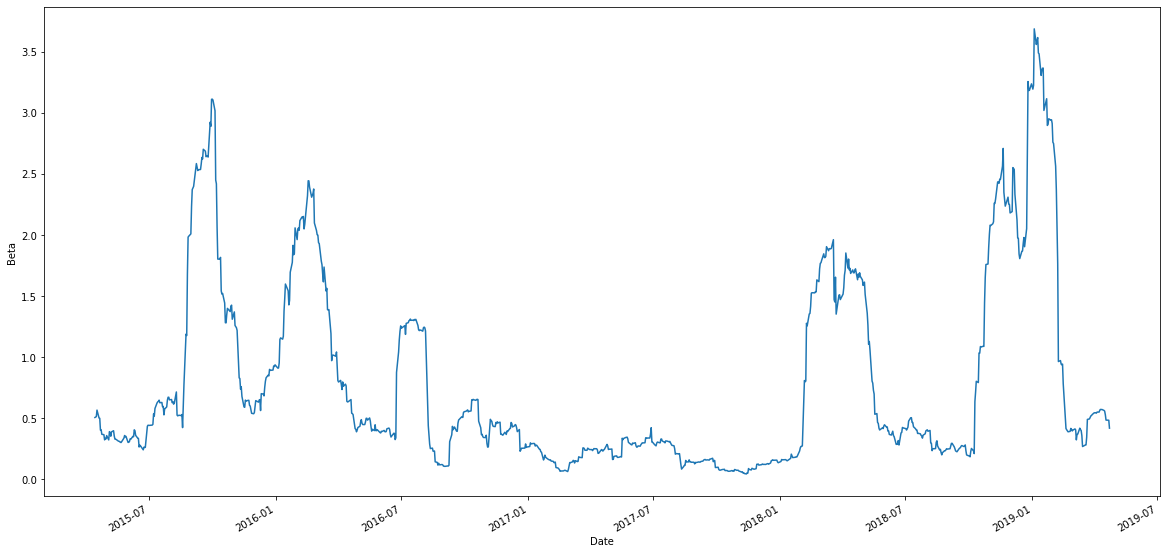

In [41]:
# Calculate and plot Beta



# Calculate covariance of a single portfolio
covariance_final = combined_stock_df.rolling(window=60).cov(combined_df['closing prices - sp500'])
# Calculate variance of S&P 500
variance_final = combined_df['closing prices - sp500'].var()
# Computing beta
SFM_beta_final = covariance / variance
# Plot beta trend
SFM_beta_final.plot(ylabel='Beta',figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
sharpe_ratio_annual_final=combined_df.mean()/combined_df.std()*(252**.5)
sharpe_ratio_annual_final

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
closing prices - sp500         0.648267
dtype: float64

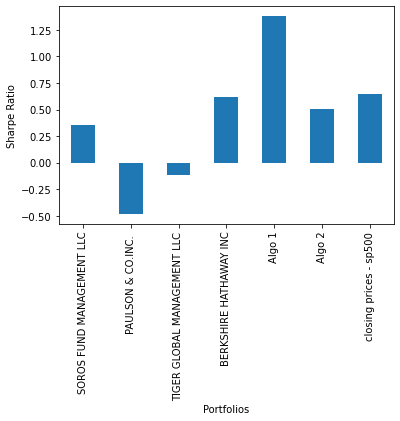

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_annual_final.plot(kind='bar',xlabel='Portfolios',ylabel='Sharpe Ratio');

### How does your portfolio do?

Write your answer here!

In [ ]:
#Was not able to accurately combine the data from the different portfolios, so I am unsure on this answer. I will be submitting this partially incomplete, and will go over this with during office hours to hopefully find the correct answer.